<a href="https://colab.research.google.com/github/Darshan05-11/BusinessManagementSystem/blob/main/predict_doctor_consultation_fees_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
df=pd.read_excel("/content/Final_Train.xlsx")
df.head()
print(df.describe())
df.info()

              Fees
count  5961.000000
mean    307.944640
std     190.920373
min       5.000000
25%     150.000000
50%     300.000000
75%     500.000000
max     950.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
df.fillna(df.mode().iloc[0], inplace=True)  # Fill missing with mode for all columns

# Separate features and target
X = df.drop("Fees", axis=1)
y = df["Fees"]

# Select categorical columns
cat_cols = X.select_dtypes(include="object").columns

# One-hot encode categorical features
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(ohe.fit_transform(X[cat_cols]))

# Drop original categorical and concat encoded
X = X.drop(cat_cols, axis=1)
X = pd.concat([X.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)


/tmp/ipython-input-17-1300041640.py:20: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  X = pd.concat([X.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       346,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 348,801 (1.33 MB)

 Trainable params: 348,801 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 128573.5312 - val_loss: 105001.3906
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 87604.3516 - val_loss: 40630.2383
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 40320.5977 - val_loss: 33763.0469
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 34310.1562 - val_loss: 30410.6621
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 29344.7383 - val_loss: 28535.6777
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 25873.4707 - val_loss: 27516.8867
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 24732.0938 - val_loss: 26981.9980
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 23859.1113 - val_loss: 26617.1055
Epoch 9/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 21845.7520 - val_loss: 26397.3145
Epoch 10/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 20395.6855 - val_loss: 26246.3320
Epoch 11/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/ste

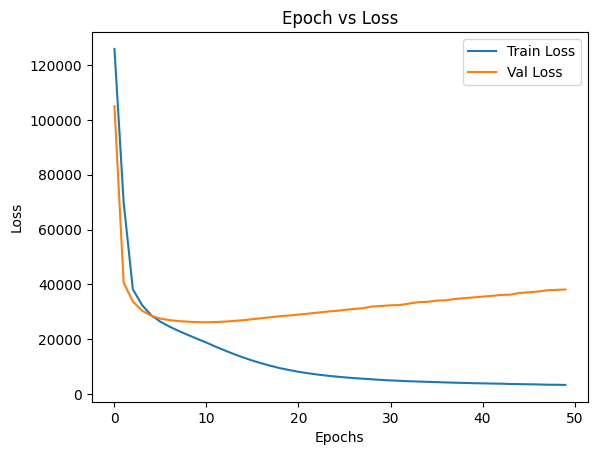

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()


In [27]:
model.predict(X_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[118.06969],
       [216.70384],
       [593.1305 ],
       ...,
       [296.4904 ],
       [299.38776],
       [ 97.88314]], dtype=float32)

In [29]:
# Make predictions
y_pred = model.predict(X_test)

# Reverse the scaling (optional, only if you scaled y before)
# If you didn't scale y, you can skip this step.
# from sklearn.preprocessing import MinMaxScaler
# y_pred = scaler_y.inverse_transform(y_pred)
# y_test = scaler_y.inverse_transform(y_test)

# Display some predicted vs actual values
for i in range(10):
    # Use .iloc[i] to access y_test by positional index
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {y_test.iloc[i]:.2f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted: 118.07, Actual: 300.00
Predicted: 216.70, Actual: 200.00
Predicted: 593.13, Actual: 400.00
Predicted: 601.47, Actual: 250.00
Predicted: 409.26, Actual: 500.00
Predicted: 516.83, Actual: 100.00
Predicted: 112.29, Actual: 300.00
Predicted: 210.68, Actual: 200.00
Predicted: 355.80, Actual: 300.00
Predicted: 114.01, Actual: 100.00
